In [1]:
import pandas as pd
import os
import re
import nlpcda as nc
from sklearn.preprocessing import MultiLabelBinarizer



In [93]:
cl

,cate,labels
0,1373,集合/集合概念
1,1374,集合/集合运算
2,1376,逻辑
3,1377,逻辑/命题关系
4,1378,充分条件/必要条件/充要条件
...,...,...
191,1565,复数综合运算
192,1566,数系扩充
193,1567,矩阵行列式
194,1568,矩阵


In [255]:
cl = readcate_labels("./data/labels.csv")

def readcate_labels(filename):
    data = pd.read_csv(filename)
    return data





def txtpreprocess(txt, removenoncn=True, removetrim=True):
    res = txt
    res = re.sub("A.*B.*答案.*解析", "", res)
    res = re.sub("\(?本小题满分.*分\)?","",res)
    res = re.sub("\(?本小题共.*分\)?","",res)
    res = re.sub("答案.*解析","",res)
    res = re.sub("[,，、]+",",",res)
    res = re.sub("[….]+.*分","",res)

    res = re.sub(r'[^\u4e00-\u9fa5]', "", res)
    #print(res,len(res))
    return res.replace("\n", "").replace("\"", "").strip("\"")


def readexercisefiles(path):
    df = pd.DataFrame(columns=["exercise_text", 'labels'])
    for i in range(1373, 1394):
        predf_labels = cl[cl["cate"]==i]
        print(predf_labels)
        fn = path + str(i)
        if os.path.exists(fn):
            with open(fn) as f:
                ls = f.readlines()
                for l in ls:
                    exertext = txtpreprocess(
                        l)
                    if len(exertext)>10:
                        df = df.append({"exercise_text": exertext,
                                    "labels": predf_labels}, ignore_index=True)
    return df
def readdata(labelidx):
    fn = "./data/senior_Math" + str(labelidx)
    df = pd.DataFrame(columns=["exercise_text", 'labels'])

    predf_label = cl.iloc[labelidx-1373].at["labels"]
    if len(predf_label)==0:
        return df
    with open(fn) as f:
        ls = f.readlines()
        for l in ls:
            exertext = txtpreprocess(
                l)
            if len(exertext)>15:
                df = df.append({"exercise_text": exertext,
                            "labels": predf_label}, ignore_index=True)
    return df.drop_duplicates(subset=["exercise_text"], keep='first', inplace=False)

for i in [1375,1449,1450,1386,1377,1431,1400]:
    readdata(i).to_csv("./data/processed/"+str(i)+".csv",index = False)
        

In [256]:
with open("./data/processed/1450.csv") as f, open("./data/processed/1450_p.csv","w") as f2:
    ls = f.readlines()
    for l in ls:
        label = l.split(',')[1]
        newl = l[:-1]
        if re.search(r"(奇函数)+", l) or re.search(r"(偶函数)+", l) or re.search(r"(奇偶)+", l):
            if not re.search(r"(函数奇偶性)+", label):
                newl += "/函数奇偶性"
        if re.search(r"(正弦)+", l) or re.search(r"(余弦)+", l) or re.search(r"(三角函数)+", l):    
            if not re.search(r"(三角函数)+", label):
                newl += "/三角函数"
        if re.search(r"(命题)+", l) or re.search(r"(充分)+", l) or re.search(r"(必要)+", l) or re.search(r"(充要)+", l):    
            if not re.search(r"(逻辑与命题关系)+", label):
                newl += "/逻辑与命题关系"
        if re.search(r"(集合)+", l) or re.search(r"(并集)+", l) or re.search(r"(交集)+", l) or re.search(r"(子集)+", l) or re.search(r"(空集)+", l) or re.search(r"(韦恩图)+", l):     
            if not re.search(r"(集合)+", label):
                newl += "/集合"
        if re.search(r"(导数)+", l) or re.search(r"(切线)+", l) or re.search(r"(极值)+", l) or re.search(r"(单调递)+", l) or re.search(r"(单调区间)+", l) :    
            if not re.search(r"(导数)+", label):
                newl += "/导数"
        if re.search(r"(平面向量)+", l) or re.search(r"(向量)+", l) :    
            if not re.search(r"(平面向量)+", label):
                newl += "/平面向量"
        if re.search(r"(等差数列)+", l) :    
            if not re.search(r"(等差数列)+", label):
                newl += "/等差数列"
        if re.search(r"(等比数列)+", l) :    
            if not re.search(r"(等比数列)+", label):
                newl += "/等比数列"
        f2.write(newl+"\n")
            

In [257]:
for i in [1375,1449,1386,1377,1431,1400]:
    with open("./data/processed/"+str(i) +".csv") as f, open("./data/processed/"+str(i)+ "_p.csv","w") as f2:
        ls = f.readlines()
        for l in ls:
            bool11 = re.search(r"(奇函数)+", l) or re.search(r"(偶函数)+", l) or re.search(r"(奇偶)+", l)
            bool12 = re.search(r"(函数奇偶性)+", label) 
            bool21 = re.search(r"(正弦)+", l) or re.search(r"(余弦)+", l) or re.search(r"(三角函数)+", l)
            bool22 = re.search(r"(三角函数)+", label)
            bool31 = re.search(r"(命题)+", l) or re.search(r"(充分)+", l) or re.search(r"(必要)+", l) or re.search(r"(充要)+", l)
            bool32 = re.search(r"(逻辑与命题关系)+", label)
            bool41 = re.search(r"(集合)+", l) or re.search(r"(并集)+", l) or re.search(r"(交集)+", l) or re.search(r"(子集)+", l) or re.search(r"(空集)+", l) or re.search(r"(韦恩图)+", l)
            bool42 = re.search(r"(集合)+", label)
            bool51 = re.search(r"(导数)+", l) or re.search(r"(切线)+", l) or re.search(r"(极值)+", l) or re.search(r"(单调递)+", l) or re.search(r"(单调区间)+", l)
            bool52 = re.search(r"(导数)+", label)
            bool61 = re.search(r"(平面向量)+", l) or re.search(r"(向量)+", l)
            bool62 = re.search(r"(平面向量)+", label)
            bool71 = re.search(r"(数列)+", l)
            bool72 =  re.search(r"(数列)+", label)
            label = l.split(',')[1]
            newl = l[:-1]
            if bool11 and not bool12:
                newl += "/函数奇偶性"
            if bool21 and not bool22:    
                newl += "/三角函数"
            if bool31 and not bool32:    
                newl += "/逻辑与命题关系"
            if bool41 and not bool42:
                newl += "/集合"
            if bool51 and not bool52:
                newl += "/导数"
            if bool61 and not bool62:
                newl += "/平面向量"
            if bool71 and not bool72:
                newl += "/数列"
            f2.write(newl+"\n")


In [273]:
dflst = []
for i in [1375, 1449,1386,1377,1431,1400]:
    dflst.append(pd.read_csv("./data/processed/"+str(i)+ "_p.csv"))
tl = pd.concat(dflst)
dflst


[                                         exercise_text labels
 0                                     若是小于的正整数是奇数是的倍数则     集合
 1    某班共人其中人喜爱篮球运动人喜爱兵乓球运动人对这两项运动都不喜爱则喜爱篮球运动但不喜爱乒乓球...     集合
 2    某班有名同学参加数学物理化学课外探究小组每名同学至多参加两个小组已知参加数学物理化学小组的人...     集合
 3                             已知全集中有个元素中有个元素若非空则的元素个数为     集合
 4                       设全集是实数集函数的定义域为则如图所示阴影部分所表示的集合是     集合
 ..                                                 ...    ...
 144            设全集考点交并补集的混合运算分析先根据补集的含义求再根据交集的含义求即可解故选     集合
 145  已知全集且考点元素与集合关系的判断专题计算题分析先解绝对值不等式求出集合再求出其补集解一元二...     集合
 146                                 本题满分分设其中如果求实数的取值范围     集合
 147  已知集合则下列结论正确的是考点交并补集的混合运算分析为对数函数的值域结合对数函数的图象求出为...     集合
 148                           已知集合则因为要求有三个值则是所以的交集是所以选     集合
 
 [149 rows x 2 columns],
                                          exercise_text labels
 0                             已知为等差数列以表示的前项和则使得达到最大值的是     数列
 1                               设是公差不为的等差数列且成等比数列则的前项和     数列
 2                          

In [278]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_result = mlb.fit_transform(
    [str(tl.loc[i, 'labels']).split('/') for i in range(len(tl))])

In [279]:
mlb_result

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [280]:
df_final = pd.concat([tl['exercise_text'], pd.DataFrame(
    mlb_result, columns=list(mlb.classes_))], axis=1)

In [282]:
df_final = df_final.drop_duplicates(subset=["exercise_text"], keep='first', inplace=False)

In [283]:
df_final.shuffle()

,exercise_text,三角函数,函数奇偶性,导数,平面向量,数列,逻辑与命题关系,集合
0,若是小于的正整数是奇数是的倍数则,0,0,0,0,0,0,1
1,某班共人其中人喜爱篮球运动人喜爱兵乓球运动人对这两项运动都不喜爱则喜爱篮球运动但不喜爱乒乓球...,0,0,0,0,0,0,1
2,某班有名同学参加数学物理化学课外探究小组每名同学至多参加两个小组已知参加数学物理化学小组的人...,0,0,0,0,0,0,1
3,已知全集中有个元素中有个元素若非空则的元素个数为,0,0,0,0,0,0,1
4,设全集是实数集函数的定义域为则如图所示阴影部分所表示的集合是,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
3982,已知函数在点处的切线方程为求的值对函数定义域内的任一个实数恒成立求实数的取值范围由而点在直线...,0,0,1,0,0,0,0
3983,设函数曲线过点且在点处的切斜线率为求的值证明由已知条件得即解得的定义域为由知设则当时当时所以...,0,0,1,0,0,0,0
3984,曲线在点处的切线的斜率为试题分析故切线的斜率考点复合函数的导数导数求切线的斜率,0,0,1,0,0,0,0
3985,已知函数其中是自然对数的底数求函数的单调区间和极值若函数对任意满足求证当时若且求证,0,0,1,0,0,0,0


In [284]:
dfbk = df_final

In [285]:
df_train = df_final.sample(frac=0.75, random_state =0, axis=0)

In [286]:
df_train

,exercise_text,三角函数,函数奇偶性,导数,平面向量,数列,逻辑与命题关系,集合
3481,已知函数其中曲线在点处的切线垂直于轴求的值求函数的极值求导得曲线在点处的切线垂直于轴则函数在...,0,0,1,0,0,0,0
3302,已知函数的图像在点处的切线斜率为类猜想等数学思想,0,0,1,0,0,0,0
1881,设函数给出如下四个命题若则为奇函数若则函数在上是增函数函数的图象关于点成中心对称图形关于的方...,0,1,0,0,0,1,0
2937,若平面向量与的夹角是且则的坐标为试题分析因为所以所以所以考点向量的共线向量的模,0,0,0,1,0,0,0
1285,分已知函数是偶函数求的值设若函数与的图象有且只有一个公共点求实数的取值范围当时由题得方程有一...,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2166,对任意正整数定义双阶乘如下当为偶数时当为奇数时现有如下四个命题设若的个位数不是则设为正质数为...,0,0,0,0,0,1,0
3734,设函数是定义在上的函数其中的导函数满足对于恒成立则试题分析函数的导数为故函数是定义在上的减函...,0,0,1,0,0,0,0
3149,设求的单调区间并证明对上的任意都有将的图像向下平移个单位同时将的图像向上平移个单位使它们恰有...,0,0,1,0,0,0,0
421,已知数列的前项和为则关于的命题其中若是关于的二次函数则是等差数列若是等比数列且则若是等差数列...,0,0,0,0,1,1,0


In [287]:
df_test=df_final[~df_final.index.isin(df_train.index)]

In [288]:
df_test

,exercise_text,三角函数,函数奇偶性,导数,平面向量,数列,逻辑与命题关系,集合
0,若是小于的正整数是奇数是的倍数则,0,0,0,0,0,0,1
3,已知全集中有个元素中有个元素若非空则的元素个数为,0,0,0,0,0,0,1
7,已知全集集合则集合中元素的个数为,0,0,0,0,0,0,1
12,如图阴影是集合在平面直角坐标系上表示的点集则阴影中间形如水滴部分的面积等于考点几何概型专题计...,0,0,0,0,0,0,1
21,有下列四个命题若若的逆否命题若是奇函数则的否命题若的逆命题其中真命题的个数是,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...
3956,记函数的最大值为最小值为则的值为试题分析由已知得解得所以函数的定义域是已知函数求导得时当时当...,0,0,1,0,0,0,0
3957,已知函数若函数在处取得极值求实数的值若关于的方程在区间上恰有两个不同的实数根求实数的取值范围...,0,0,1,0,0,0,0
3960,函数上有最小值实数的取值范围是试题分析由题令解得令解得或由此得函数在上是减函数在上是增函数在...,0,0,1,0,0,0,0
3980,由直线与曲线所围成的封闭图形的面积为试题分析在同一坐标系中作出的图象如图所示则所围成的封闭图...,0,0,1,0,0,0,0


In [289]:
df_train.to_csv("./data/train.csv",index=False)
df_test.to_csv("./data/test.csv",index=False)

In [293]:
cols_target = df_train.columns[1:].tolist()
cols_target

['三角函数', '函数奇偶性', '导数', '平面向量', '数列', '逻辑与命题关系', '集合']

In [294]:
train_df_corr= df_train[cols_target].corr()

In [296]:
import numpy as np

In [309]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('whitegrid',{'font.sans-serif':['STXihei','Arial']})


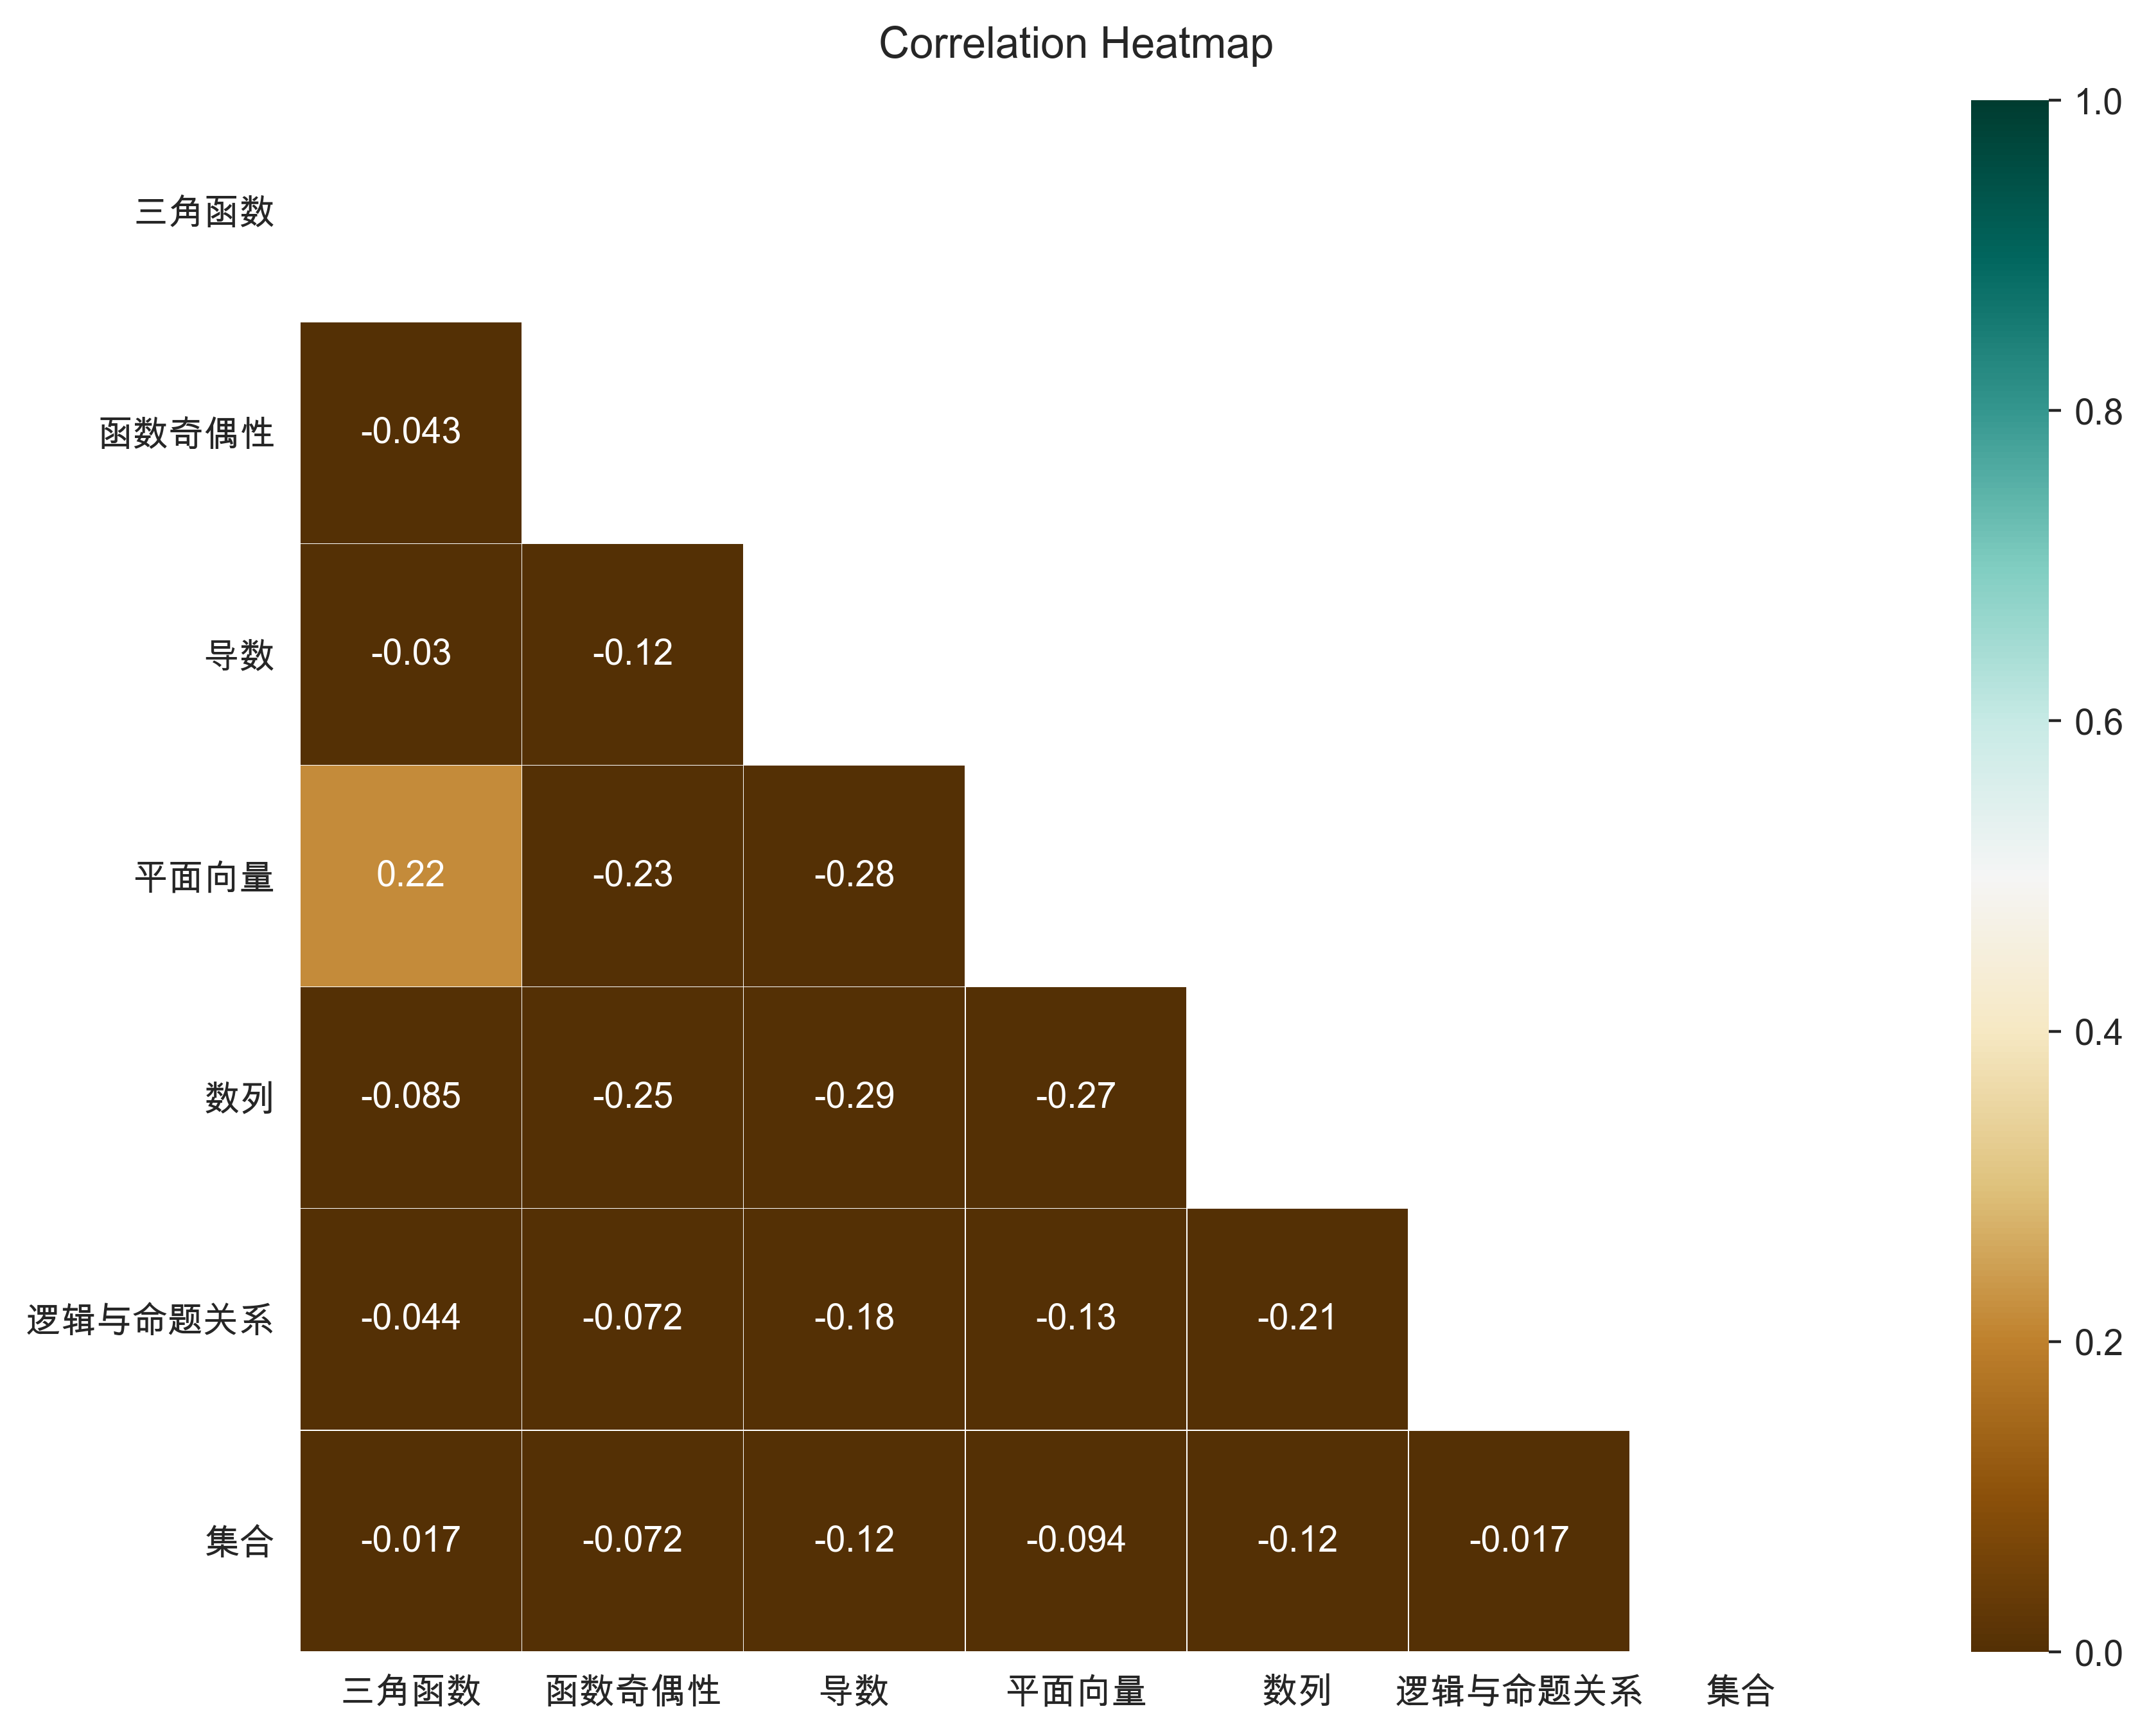

In [315]:
plt.rcParams['font.family'] = ['Arial Unicode MS'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
 
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})

train_df_corr= df_train[cols_target].corr()
mask = np.triu(np.ones_like(train_df_corr, dtype=np.bool))
plt.figure(figsize=(12,8), dpi=400)

heatmap = sns.heatmap(train_df_corr,mask=mask, linewidths=0.1, vmin=0, vmax=1,cmap='BrBG',annot=True,square=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [312]:
print('Total rows in test is {}'.format(len(df_train)))
print('Total rows in train is {}'.format(len(df_test)))
print(df_train[cols_target].sum())

Total rows in test is 2977
Total rows in train is 992
三角函数        71
函数奇偶性      520
导数         750
平面向量       618
数列         746
逻辑与命题关系    526
集合         155
dtype: int64


In [316]:
import numpy as np
import torch
from transformers import BertModel, BertConfig, BertTokenizer
from scipy.spatial.distance import cosine

from torch import nn

config_path = 'pretrained_model/chinese_wwm_ext_pytorch/bert_config.json'
model_path = 'pretrained_model/chinese_wwm_ext_pytorch/pytorch_model.bin'
vocab_path = 'pretrained_model/chinese_wwm_ext_pytorch/vocab.txt'

al_config_path = 'model/albert_tiny/bert_config.json'
al_model_path = 'model/albert_tiny/pytorch_model.bin'
al_vocab_path = 'model/albert_tiny/vocab.txt'


class BertTextNet(nn.Module):
    def __init__(self):
        """
        bert模型。
        """
        super(BertTextNet, self).__init__()
        modelConfig = BertConfig.from_pretrained(config_path)
        self.textExtractor = BertModel.from_pretrained(
            model_path, config=modelConfig)
        self.tokenizer = BertTokenizer.from_pretrained(vocab_path)

    def embed(text):
        text = "[CLS] {} [SEP]".format(text)
        tokens, segments, input_masks = [], [], []
        tokenized_text = self.tokenizer.tokenize(text)  # 用tokenizer对句子分词
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(
            tokenized_text)  # 索引列表
        tokens.append(indexed_tokens)
        segments.append([0] * len(indexed_tokens))
        input_masks.append([1] * len(indexed_tokens))

    def forward(self, tokens, segments, input_masks):
        output = self.textExtractor(tokens, token_type_ids=segments,
                                    attention_mask=input_masks)
        text_embeddings = output[0][:, 0, :]
        return text_embeddings


class BertSeqVec(object):
    def __init__(self, text_net):
        """
        接收一个bert或albert模型，对文本进行向量化。
        :param text_net: bert或albert模型实例。
        """
        self.text_net = text_net
        self.tokenizer = text_net.tokenizer

    def seq2vec(self, text):
        """
        对文本向量化。
        :param text:str，未分词的文本。
        :return:
        """
        text = "[CLS] {} [SEP]".format(text)
        tokens, segments, input_masks = [], [], []

        tokenized_text = self.tokenizer.tokenize(text)  # 用tokenizer对句子分词
        indexed_tokens = self.tokenizer.convert_tokens_to_ids(
            tokenized_text)  # 索引列表
        tokens.append(indexed_tokens)
        segments.append([0] * len(indexed_tokens))
        input_masks.append([1] * len(indexed_tokens))

        max_len = max([len(single) for single in tokens])  # 最大的句子长度

        for j in range(len(tokens)):
            padding = [0] * (max_len - len(tokens[j]))
            tokens[j] += padding
            segments[j] += padding
            input_masks[j] += padding
        tokens_tensor = torch.tensor(tokens)
        segments_tensors = torch.tensor(segments)
        input_masks_tensors = torch.tensor(input_masks)
        text_hashCodes = self.text_net(tokens_tensor, segments_tensors,
                                       input_masks_tensors)  # text_hashCodes是bert模型的文本特征
        return text_hashCodes[0].detach().numpy()

In [319]:
text_net = BertTextNet()  # 选择一个文本向量化模型
seq2vec = BertSeqVec(text_net)  # 将模型实例给向量化对象。

/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1614: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


In [324]:
from transformers import PreTrainedTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
tokenizer = PreTrainedTokenizerFast.from_pretrained('hfl/chinese-bert-wwm')
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
def prepare_set(dataset, max_length=64):
    """returns input_ids, input_masks, labels for set of data ready in BERT format"""
    global tokenizer
    
    input_ids = dataset
#     for i in tqdm(dataset):
#         input_ids.append(camel_case_split(i))
    tokenized = tokenizer.batch_encode_plus(input_ids,return_token_type_ids=False, return_attention_mask=False, pad_to_max_length=True,truncation=True, max_length=max_length)["input_ids"]
    return tokenized

In [326]:
max_length = 64
hidden_size=64
batch_size = 32
n_epochs = 4
embed_size = 64
lr = 0.001
model_path = "BiLSTM_attention_BiRel.pt"
use_gpu = True
dev_size = int(df_train.shape[0] * 0.10)

In [327]:
device =  torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')

In [444]:
device

device(type='cpu')

In [445]:
labelemb = prepare_set(cols_target)

In [446]:
labelemb

[[101,
  676,
  6235,
  1141,
  3144,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  1141,
  3144,
  1936,
  981,
  2595,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [101,
  2193,
  3144,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [447]:
from scipy.spatial.distance import cosine

In [329]:
class Attention(nn.Module):
    """a Single Attention Layer"""
    def __init__(self, feature_dim):
        super(Attention, self).__init__()
        
        self.supports_masking = True
        self.feature_dim = feature_dim
        weight = torch.zeros(feature_dim, 1)
        nn.init.xavier_uniform_(weight)
        self.weight = nn.Parameter(weight)
    
    def forward(self, x, step_dim, mask=None):
        feature_dim = self.feature_dim
        eij = torch.mm(
            x.contiguous().view(-1, feature_dim), self.weight
        ).view(-1, step_dim)
        eij = torch.tanh(eij)
        a = torch.exp(eij)
        if mask is not None:
            a = a * mask
        a = a / torch.sum(a, 1, keepdim=True) + 1e-10
        weighted_input = x * torch.unsqueeze(a, -1)
        return torch.sum(weighted_input, 1), torch.unsqueeze(a, -1)


class BiLSTMWithAttention(nn.Module):
    """the BiLSTM model refer to the image above to understand the structure of the model"""
    def __init__(self,hidden_size,embed_size,max_features,num_classes,max_length):
        super().__init__()
        self.embedding = nn.Embedding(max_features, embed_size)
        self.lstm1 = nn.LSTM(embed_size, hidden_size, bidirectional=True, batch_first=True)
        
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, bidirectional=True, batch_first=True)
        
        self.lstm_attention = Attention(hidden_size * 2)
        
        self.linear1 = nn.Linear(hidden_size*6, hidden_size*6)
        self.linear2 = nn.Linear(hidden_size*6, hidden_size*6)
        
        self.linear_out = nn.Linear(hidden_size*6, 1)
        self.linear_aux_out = nn.Linear(hidden_size*6, num_classes)
    
    def forward(self, x, step_len):
        h_embedding = self.embedding(x)
        h_lstm1, _ = self.lstm1(h_embedding)
        h_lstm2, _ = self.lstm2(h_lstm1)
        #Attention layer
        h_lstm_atten, weights = self.lstm_attention(h_lstm2, max_length)
        # global average pooling
        avg_pool = torch.mean(h_lstm2, 1)
        # global max pooling
        max_pool, _ = torch.max(h_lstm2, 1)
        h_conc = torch.cat((h_lstm_atten, max_pool, avg_pool), 1)
        h_conc_linear1 = F.relu(self.linear1(h_conc))
        h_conc_linear2 = F.relu(self.linear2(h_conc))
        
        hidden = h_conc + h_conc_linear1 + h_conc_linear2
        result = self.linear_out(hidden)
        aux_result = self.linear_aux_out(hidden)
#         out = torch.cat([result, aux_result], 1)
#         print(f"out : {out.shape}")
#         return out, weights
        return aux_result, weights


In [412]:
def train_model(models, loss_fn, lr=0.001, batch_size=32, n_epochs=10,max_length=64):
    for col in cols_target:
        models[col]['param_lrs'] = [{'params': param, 'lr': lr} for param in models[col]['model'].parameters()]
        models[col]['optimizer'] = torch.optim.Adam(models[col]['param_lrs'], lr=lr)
        models[col]['training_loss'] = []
        models[col]['validation_loss'] = []

    
    
    for model_index,target_label in enumerate(cols_target):
        print("="*50)
        print(f"training {target_label} model....")
        models[target_label]['model'].to(device)
        
        best_loss = float("inf")
        
        for epoch in range(n_epochs):
            start_time = time.time()

            models[target_label]['model'].train()
            avg_loss = 0

            for data in tqdm(train_dataloader, disable=False):
                x_batch = data[:-1]
                y_batch = data[-1][:,model_index].unsqueeze(1)

                y_pred, _ = models[target_label]['model'](*x_batch, max_length)
                
                loss = nn.BCEWithLogitsLoss()(y_pred,y_batch)
                models[target_label]['optimizer'].zero_grad()
                loss.backward()
                models[target_label]['optimizer'].step()
                avg_loss += loss.item() / len(train_dataloader)

            models[target_label]['training_loss'].append(avg_loss)
            models[target_label]['model'].eval()
            
            print(f'... Validating ... ')
            
            avg_val_loss = 0
            
            for val_data in tqdm(dev_dataloader, disable=False):
                x_batch = val_data[:-1]
                y_batch = val_data[-1][:,model_index].unsqueeze(1)

                y_pred, _ = models[target_label]['model'](*x_batch, max_length)

                val_loss = nn.BCEWithLogitsLoss()(y_pred, y_batch)
                avg_val_loss += val_loss.item() / len(dev_dataloader)

            elapsed_time = time.time() - start_time
            models[target_label]['validation_loss'].append(avg_val_loss)
            
            if avg_val_loss < best_loss:
                print('saving the best model so far')
                best_loss = avg_val_loss
                torch.save(models[target_label]['model'].state_dict(), target_label+'_model.pt')
            print(f'Epoch {epoch + 1}/{n_epochs}\t training_loss={avg_loss:.4f} \t validation_loss={avg_val_loss: 4f} \t time={elapsed_time:.2f}s')
    
    models.clear()
    
    models = {
        '三角函数':{},
        '函数奇偶性':{},
        '导数':{},
        '平面向量':{},
        '数列':{},
        '逻辑与命题关系':{},
        '集合':{}
    }
    
    
    print("loading best models .... ")
    for target_label in cols_target:
        # load each best model into its corresponding dict key
        models[target_label]['model'] = BiLSTMWithAttention(hidden_size=hidden_size,
                        embed_size=embed_size,
                        max_features=tokenizer.vocab_size,
                        num_classes=1,
                        max_length=max_length)
        models[target_label]['model'].load_state_dict(torch.load(target_label+'_model.pt'))
        os.remove(target_label+'_model.pt')
    
    print("saving best models into a single file .... ")
    # saving all models in a single model file
    torch.save({
            '三角函数': models['三角函数']['model'].state_dict(),
            '函数奇偶性': models['函数奇偶性']['model'].state_dict(),
            '导数': models['导数']['model'].state_dict(),
            '平面向量': models['平面向量']['model'].state_dict(),
            '数列': models['数列']['model'].state_dict(),
            '逻辑与命题关系': models['逻辑与命题关系']['model'].state_dict(),
            '集合': models['集合']['model'].state_dict(),
            }, model_path)
def evaluate(models):
    for model_index,target_label in enumerate(cols_target):
        
        print("="*40)
        print(f"evaluating {target_label} model .... ")
        
        y_preds = []
        y_trues = []
        
        models[col]['model'].eval()
        with torch.no_grad():
            for tst_data in tqdm(test_dataloader, disable=False):
                x_batch = tst_data[:-1]
                y_batch_labels = tst_data[-1][:,model_index].detach().cpu().numpy()

                y_pred, _ = models[col]['model'](*x_batch, max_length)

                y_pred_labels = (torch.sigmoid(y_pred).detach().cpu().numpy() > 0.5)

                y_preds.extend(y_pred_labels.squeeze(1))
                y_trues.extend(y_batch_labels)
        
        print(confusion_matrix(y_true=y_trues,y_pred=y_preds))
        print(classification_report(y_trues,y_preds))
    

In [440]:
models = {
    '三角函数':{},
    '函数奇偶性':{},
    '导数':{},
    '平面向量':{},
    '数列':{},
    '逻辑与命题关系':{},
    '集合':{}
}
for col in cols_target:
    models[col]['model'] = BiLSTMWithAttention(hidden_size=hidden_size,
                            embed_size=embed_size,
                            max_features=tokenizer.vocab_size,
                            num_classes=1,
                            max_length=max_length)

In [441]:
models

{'三角函数': {'model': BiLSTMWithAttention(
    (embedding): Embedding(21128, 64)
    (lstm1): LSTM(64, 64, batch_first=True, bidirectional=True)
    (lstm2): LSTM(128, 64, batch_first=True, bidirectional=True)
    (lstm_attention): Attention()
    (linear1): Linear(in_features=384, out_features=384, bias=True)
    (linear2): Linear(in_features=384, out_features=384, bias=True)
    (linear_out): Linear(in_features=384, out_features=1, bias=True)
    (linear_aux_out): Linear(in_features=384, out_features=1, bias=True)
  )},
 '函数奇偶性': {'model': BiLSTMWithAttention(
    (embedding): Embedding(21128, 64)
    (lstm1): LSTM(64, 64, batch_first=True, bidirectional=True)
    (lstm2): LSTM(128, 64, batch_first=True, bidirectional=True)
    (lstm_attention): Attention()
    (linear1): Linear(in_features=384, out_features=384, bias=True)
    (linear2): Linear(in_features=384, out_features=384, bias=True)
    (linear_out): Linear(in_features=384, out_features=1, bias=True)
    (linear_aux_out): Linear

In [414]:
train_df_cpy = df_train[dev_size:]
dev_df_cpy = df_train[:dev_size]
test_df_cpy = df_test
print("preprocessing training data...")
X_train = prepare_set(train_df_cpy['exercise_text'].values.tolist())
#y_true_cpy = y_true

preprocessing training data...


/Users/maywzh/.pyenv/versions/3.8.6/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2068: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [415]:
print("preprocessing training data...")
X_dev = prepare_set(dev_df_cpy['exercise_text'].values.tolist())
X_test = prepare_set(df_test['exercise_text'].values.tolist())

preprocessing training data...


In [448]:
cosine(labelemb[0],X_dev[0])

0.7762155458808947

3481    已知函数其中曲线在点处的切线垂直于轴求的值求函数的极值求导得曲线在点处的切线垂直于轴则函数在...
3302                             已知函数的图像在点处的切线斜率为类猜想等数学思想
1881    设函数给出如下四个命题若则为奇函数若则函数在上是增函数函数的图象关于点成中心对称图形关于的方...
2937              若平面向量与的夹角是且则的坐标为试题分析因为所以所以所以考点向量的共线向量的模
1285    分已知函数是偶函数求的值设若函数与的图象有且只有一个公共点求实数的取值范围当时由题得方程有一...
                              ...                        
2496                       二面角大小为半平面内分别有点考点向量的和的表示向量的模的求法
1436                   已知函数和都是定义在上的奇函数函数在区间上的最大值是则在上的最小值是
1868                                  对于平面和共面的直线下列命题中真命题是
1319                       已知奇函数有最大值且其中实数是正整数求的解析式令证明是正整数
1296                           已知定义域为的函数为奇函数且满足当时求在上的解析式求
Name: exercise_text, Length: 297, dtype: object

In [416]:
y_train = train_df_cpy[cols_target].values
y_dev = dev_df_cpy[cols_target].values
y_test = df_test[cols_target].values

In [417]:
x_train_torch = torch.tensor(X_train, dtype=torch.long).to(device)
x_dev_torch = torch.tensor(X_dev, dtype=torch.long).to(device)
x_test_torch = torch.tensor(X_test, dtype=torch.long).to(device)

In [418]:
y_train_torch = torch.tensor(y_train,dtype=torch.float).to(device)
y_dev_torch = torch.tensor(y_dev, dtype=torch.float).to(device)
# y_val_torch = torch.tensor(np.hstack([y_val, y_aux_val]), dtype=torch.float32).to(device)
y_test_torch = torch.tensor(y_test,dtype=torch.float).to(device)

In [419]:
# Create the DataLoader for training set
train_data = TensorDataset(x_train_torch, y_train_torch)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [420]:
# Create the DataLoader for dev set
dev_data = TensorDataset(x_dev_torch, y_dev_torch)
dev_sampler = RandomSampler(dev_data)
dev_dataloader = DataLoader(dev_data, sampler=dev_sampler, batch_size=batch_size)

In [421]:
# Create the DataLoader for dev set.
test_data = TensorDataset(x_test_torch, y_test_torch)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [422]:
cols_target

['三角函数', '函数奇偶性', '导数', '平面向量', '数列', '逻辑与命题关系', '集合']

In [423]:
models

{'三角函数': {},
 '函数奇偶性': {},
 '导数': {},
 '平面向量': {},
 '数列': {},
 '逻辑与命题关系': {},
 '集合': {}}

In [424]:
for col in cols_target:
    models[col]['model'] = BiLSTMWithAttention(hidden_size=hidden_size,
                            embed_size=embed_size,
                            max_features=tokenizer.vocab_size,
                            num_classes=1,
                            max_length=max_length)

In [425]:
models

{'三角函数': {'model': BiLSTMWithAttention(
    (embedding): Embedding(21128, 64)
    (lstm1): LSTM(64, 64, batch_first=True, bidirectional=True)
    (lstm2): LSTM(128, 64, batch_first=True, bidirectional=True)
    (lstm_attention): Attention()
    (linear1): Linear(in_features=384, out_features=384, bias=True)
    (linear2): Linear(in_features=384, out_features=384, bias=True)
    (linear_out): Linear(in_features=384, out_features=1, bias=True)
    (linear_aux_out): Linear(in_features=384, out_features=1, bias=True)
  )},
 '函数奇偶性': {'model': BiLSTMWithAttention(
    (embedding): Embedding(21128, 64)
    (lstm1): LSTM(64, 64, batch_first=True, bidirectional=True)
    (lstm2): LSTM(128, 64, batch_first=True, bidirectional=True)
    (lstm_attention): Attention()
    (linear1): Linear(in_features=384, out_features=384, bias=True)
    (linear2): Linear(in_features=384, out_features=384, bias=True)
    (linear_out): Linear(in_features=384, out_features=1, bias=True)
    (linear_aux_out): Linear

In [426]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import PreTrainedTokenizerFast
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import numpy as np
import pandas as pd
import re
import os
from tqdm import tqdm
import time
import math
from sklearn.metrics import classification_report,confusion_matrix

train_model(models=models,loss_fn=None,lr=lr,batch_size=batch_size,n_epochs=n_epochs,max_length=max_length)

  2%|▏         | 2/84 [00:00<00:06, 12.16it/s]

training 三角函数 model....


 40%|████      | 4/10 [00:00<00:00, 35.75it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.53it/s]

saving the best model so far
Epoch 1/4	 training_loss=0.1293 	 validation_loss= 0.099947 	 time=7.01s


 40%|████      | 4/10 [00:00<00:00, 33.16it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 11.92it/s]

saving the best model so far
Epoch 2/4	 training_loss=0.0830 	 validation_loss= 0.086554 	 time=7.23s


 40%|████      | 4/10 [00:00<00:00, 34.47it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.47it/s]

saving the best model so far
Epoch 3/4	 training_loss=0.0384 	 validation_loss= 0.075446 	 time=7.10s


 40%|████      | 4/10 [00:00<00:00, 34.59it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.27it/s]

saving the best model so far
Epoch 4/4	 training_loss=0.0194 	 validation_loss= 0.061089 	 time=6.90s
training 函数奇偶性 model....


 40%|████      | 4/10 [00:00<00:00, 34.72it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.23it/s]

saving the best model so far
Epoch 1/4	 training_loss=0.2538 	 validation_loss= 0.129235 	 time=6.93s


 40%|████      | 4/10 [00:00<00:00, 34.87it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.70it/s]

saving the best model so far
Epoch 2/4	 training_loss=0.0714 	 validation_loss= 0.034976 	 time=6.97s


 40%|████      | 4/10 [00:00<00:00, 34.84it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.67it/s]

saving the best model so far
Epoch 3/4	 training_loss=0.0420 	 validation_loss= 0.025328 	 time=6.88s


 40%|████      | 4/10 [00:00<00:00, 35.05it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.35it/s]

Epoch 4/4	 training_loss=0.0325 	 validation_loss= 0.026503 	 time=6.91s
training 导数 model....


 40%|████      | 4/10 [00:00<00:00, 35.26it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.32it/s]

saving the best model so far
Epoch 1/4	 training_loss=0.3286 	 validation_loss= 0.114935 	 time=6.89s


 40%|████      | 4/10 [00:00<00:00, 35.26it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.81it/s]

saving the best model so far
Epoch 2/4	 training_loss=0.1262 	 validation_loss= 0.105055 	 time=6.92s


 40%|████      | 4/10 [00:00<00:00, 35.19it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.60it/s]

saving the best model so far
Epoch 3/4	 training_loss=0.0794 	 validation_loss= 0.089356 	 time=6.88s


 40%|████      | 4/10 [00:00<00:00, 35.19it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.15it/s]

saving the best model so far
Epoch 4/4	 training_loss=0.0626 	 validation_loss= 0.089106 	 time=6.86s
training 平面向量 model....


 40%|████      | 4/10 [00:00<00:00, 34.20it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.35it/s]

saving the best model so far
Epoch 1/4	 training_loss=0.1874 	 validation_loss= 0.072402 	 time=6.98s


 40%|████      | 4/10 [00:00<00:00, 35.06it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.53it/s]

saving the best model so far
Epoch 2/4	 training_loss=0.0366 	 validation_loss= 0.062803 	 time=6.97s


 40%|████      | 4/10 [00:00<00:00, 35.23it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.74it/s]

Epoch 3/4	 training_loss=0.0251 	 validation_loss= 0.086918 	 time=6.88s


 40%|████      | 4/10 [00:00<00:00, 35.46it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.37it/s]

Epoch 4/4	 training_loss=0.0194 	 validation_loss= 0.072181 	 time=6.87s
training 数列 model....


 40%|████      | 4/10 [00:00<00:00, 35.51it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.48it/s]

saving the best model so far
Epoch 1/4	 training_loss=0.1798 	 validation_loss= 0.040730 	 time=6.87s


 40%|████      | 4/10 [00:00<00:00, 34.84it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.47it/s]

Epoch 2/4	 training_loss=0.0377 	 validation_loss= 0.065842 	 time=6.88s


 40%|████      | 4/10 [00:00<00:00, 35.27it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.91it/s]

saving the best model so far
Epoch 3/4	 training_loss=0.0263 	 validation_loss= 0.031897 	 time=6.90s


 40%|████      | 4/10 [00:00<00:00, 35.10it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.15it/s]

saving the best model so far
Epoch 4/4	 training_loss=0.0194 	 validation_loss= 0.026991 	 time=6.93s
training 逻辑与命题关系 model....


 40%|████      | 4/10 [00:00<00:00, 34.42it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.70it/s]

saving the best model so far
Epoch 1/4	 training_loss=0.2706 	 validation_loss= 0.094053 	 time=6.96s


 40%|████      | 4/10 [00:00<00:00, 35.46it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.67it/s]

saving the best model so far
Epoch 2/4	 training_loss=0.0655 	 validation_loss= 0.089909 	 time=6.93s


 40%|████      | 4/10 [00:00<00:00, 35.12it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.65it/s]

saving the best model so far
Epoch 3/4	 training_loss=0.0431 	 validation_loss= 0.065447 	 time=6.90s


 40%|████      | 4/10 [00:00<00:00, 34.24it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.15it/s]

saving the best model so far
Epoch 4/4	 training_loss=0.0314 	 validation_loss= 0.054546 	 time=6.92s
training 集合 model....


 40%|████      | 4/10 [00:00<00:00, 34.61it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.50it/s]

saving the best model so far
Epoch 1/4	 training_loss=0.1699 	 validation_loss= 0.078312 	 time=6.93s


 40%|████      | 4/10 [00:00<00:00, 35.34it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.62it/s]

saving the best model so far
Epoch 2/4	 training_loss=0.0360 	 validation_loss= 0.041089 	 time=6.93s


 40%|████      | 4/10 [00:00<00:00, 34.71it/s]

... Validating ... 


  2%|▏         | 2/84 [00:00<00:06, 12.35it/s]

Epoch 3/4	 training_loss=0.0157 	 validation_loss= 0.043739 	 time=6.89s


 40%|████      | 4/10 [00:00<00:00, 34.56it/s]

... Validating ... 


100%|██████████| 10/10 [00:00<00:00, 35.73it/s]


Epoch 4/4	 training_loss=0.0095 	 validation_loss= 0.049473 	 time=6.92s
loading best models .... 
saving best models into a single file .... 


In [435]:
models_single_file = torch.load(model_path)


In [442]:
for col in cols_target:
    models[col]['model'].load_state_dict(models_single_file[col])
    models[col]['model'].to(device)

In [443]:

(models)

 19%|█▉        | 6/31 [00:00<00:00, 51.71it/s]

evaluating 三角函数 model .... 


 19%|█▉        | 6/31 [00:00<00:00, 53.35it/s]

[[923  38]
 [ 31   0]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       961
         1.0       0.00      0.00      0.00        31

    accuracy                           0.93       992
   macro avg       0.48      0.48      0.48       992
weighted avg       0.94      0.93      0.93       992

evaluating 函数奇偶性 model .... 


 19%|█▉        | 6/31 [00:00<00:00, 50.56it/s]

[[768  37]
 [186   1]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       805
         1.0       0.03      0.01      0.01       187

    accuracy                           0.78       992
   macro avg       0.42      0.48      0.44       992
weighted avg       0.66      0.78      0.71       992

evaluating 导数 model .... 


 19%|█▉        | 6/31 [00:00<00:00, 51.47it/s]

[[708  37]
 [246   1]]
              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83       745
         1.0       0.03      0.00      0.01       247

    accuracy                           0.71       992
   macro avg       0.38      0.48      0.42       992
weighted avg       0.56      0.71      0.63       992

evaluating 平面向量 model .... 


 19%|█▉        | 6/31 [00:00<00:00, 53.10it/s]

[[753  35]
 [201   3]]
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.86       788
         1.0       0.08      0.01      0.02       204

    accuracy                           0.76       992
   macro avg       0.43      0.49      0.44       992
weighted avg       0.64      0.76      0.69       992

evaluating 数列 model .... 


 19%|█▉        | 6/31 [00:00<00:00, 53.73it/s]

[[714  35]
 [240   3]]
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       749
         1.0       0.08      0.01      0.02       243

    accuracy                           0.72       992
   macro avg       0.41      0.48      0.43       992
weighted avg       0.58      0.72      0.64       992

evaluating 逻辑与命题关系 model .... 


 19%|█▉        | 6/31 [00:00<00:00, 53.19it/s]

[[778  34]
 [176   4]]
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       812
         1.0       0.11      0.02      0.04       180

    accuracy                           0.79       992
   macro avg       0.46      0.49      0.46       992
weighted avg       0.69      0.79      0.73       992

evaluating 集合 model .... 


100%|██████████| 31/31 [00:00<00:00, 53.54it/s]

[[947   0]
 [  7  38]]
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       947
         1.0       1.00      0.84      0.92        45

    accuracy                           0.99       992
   macro avg       1.00      0.92      0.96       992
weighted avg       0.99      0.99      0.99       992

